In [1]:
__author__ = "me"
__date__ = "2015_10_13"

%pylab inline
import pandas as pd
import numpy as np
import geopandas as gp

import pylab as plt
import os

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

PARQA = os.getenv('PARQA')

Populating the interactive namespace from numpy and matplotlib


/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
insps = pd.read_csv(PARQA + "data/All_Inspections.csv",index_col=0)
litter = insps[insps.Litter==1]
nolitter = insps[insps.Litter==0]

In [3]:
pid_l =  litter.groupby('Prop ID').size()
pid_n = nolitter.groupby('Prop ID').size()

df = pd.concat([pid_l,pid_n],axis=1).rename(columns={0:'failed',1:'passed'})
df['total'] = df.failed + df.passed

In [4]:
df.head()

,failed,passed,total
B001,3,15,18
B002,5,14,19
B003,2,19,21
B006,6,5,11
B007,5,6,11


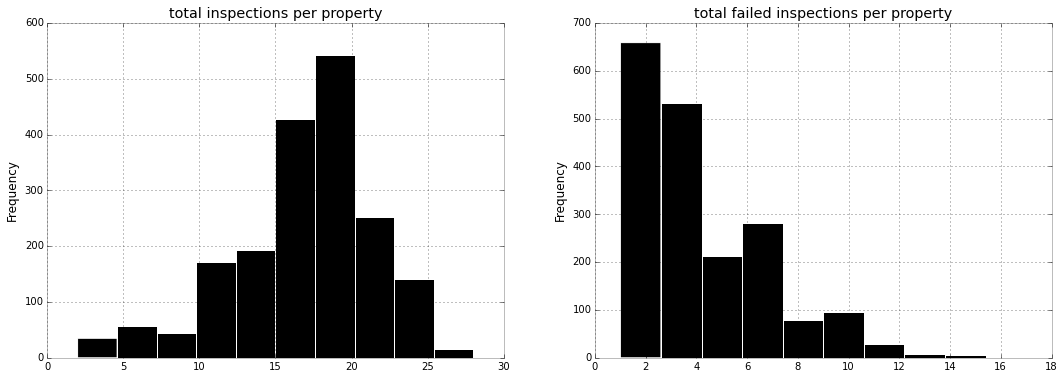

In [5]:
fig, axes = plt.subplots(1,2, figsize=(18,6))

df.total.plot(kind='hist',color='k',ax=axes[0], title='total inspections per property')
df.failed.plot(kind='hist',color='k',ax=axes[1], title='total failed inspections per property')

plt.savefig(PARQA + "parqa/Inspections/fails_per_park.png")

In [6]:
df['boro'] = df.index.str.get(0)
df.head()

,failed,passed,total,boro
B001,3,15,18,B
B002,5,14,19,B
B003,2,19,21,B
B006,6,5,11,B
B007,5,6,11,B


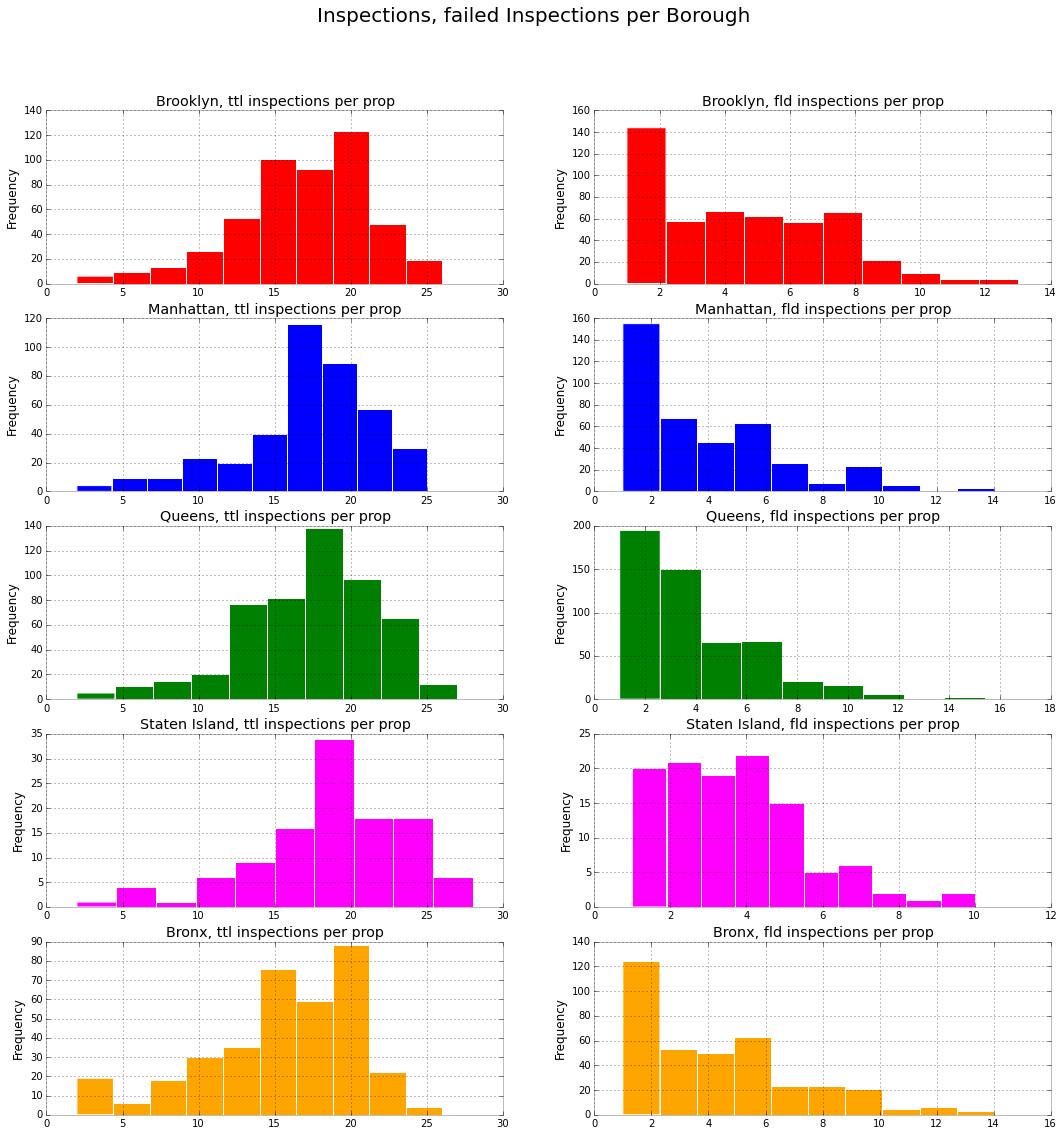

In [15]:
fig, axes = plt.subplots(5,2, figsize=(18,18))
mycolors = ('r','blue','green','magenta','orange')

d = {'M':'Manhattan',
     'B': 'Brooklyn',
     'Q': 'Queens',
     'R': 'Staten Island',
     'X': 'Bronx'}


for i, (name, g) in enumerate(df.groupby('boro')):
    name = d[name]
    g.total.plot(kind='hist',color=mycolors[i],ax=axes[i][0], title=(name + ', ttl inspections per prop'))
    g.failed.plot(kind='hist',color=mycolors[i],ax=axes[i][1], title=(name + ', fld inspections per prop'))
plt.suptitle('Inspections, failed Inspections per Borough', fontsize=20)
plt.savefig(PARQA + "parqa/Inspections/img/fails_per_park_boro.png")

In [8]:
print 'Percentage of parks at least N times failed litter:'
for x in xrange(1,10):
    print 'N=', x, '     ', 100.0*len(df[df.failed>=x])/len(df)

Percentage of parks at least N times failed litter:
N= 1       85.0626118068
N= 2       69.6779964222
N= 3       55.5903398927
N= 4       43.6940966011
N= 5       31.7531305903
N= 6       22.2271914132
N= 7       14.8032200358
N= 8       9.66010733453
N= 9       6.12701252236


## Calls

In [9]:
calls = pd.read_csv(PARQA + 'data/311/311_rPID_litter.csv', index_col=0)

In [10]:
complains = calls.groupby('rParkID').size()

In [11]:
df['calls'] = complains

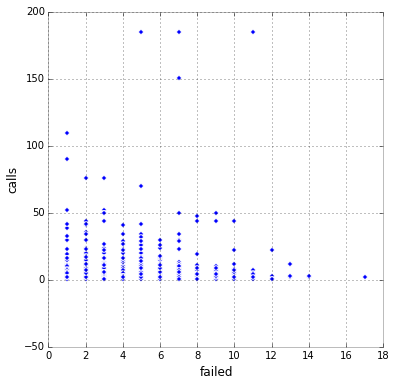

In [42]:
df.plot(kind='scatter', x='failed',y='calls', figsize=(6,6))
plt.title('Number of calls per property vs, ')
plt.savefig(PARQA + 'parqa/Inspections/inspections_calls.png')

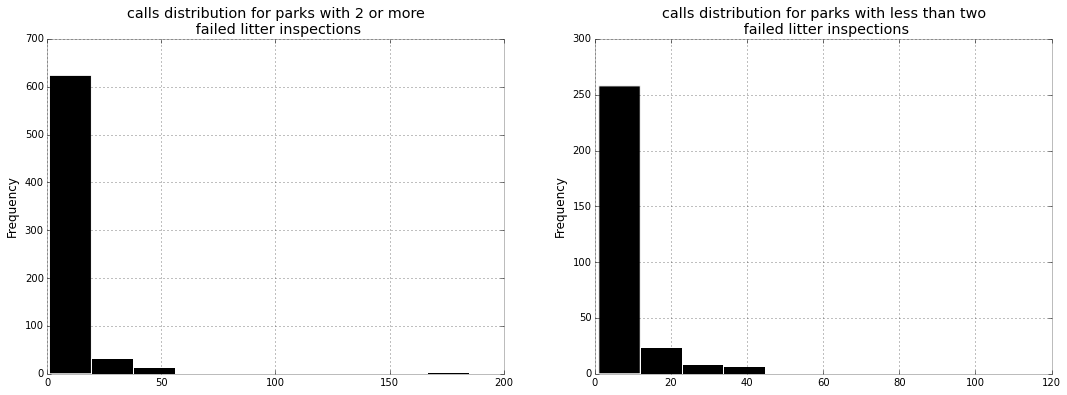

In [44]:
fig, axes = plt.subplots(1,2, figsize=(18,6))


df.calls[df.failed>2].plot(kind='hist', color='k', ax=axes[0],  title='calls distribution for parks with 2 or more\n failed litter inspections')
df.calls[df.failed<=2].plot(kind='hist', color='k', ax=axes[1], title='calls distribution for parks with less than two\n failed litter inspections')

plt.savefig(PARQA + 'parqa/Inspections/calls_distribution.png')

In [17]:
df['f_percent'] = 100.0*df.failed/df.total

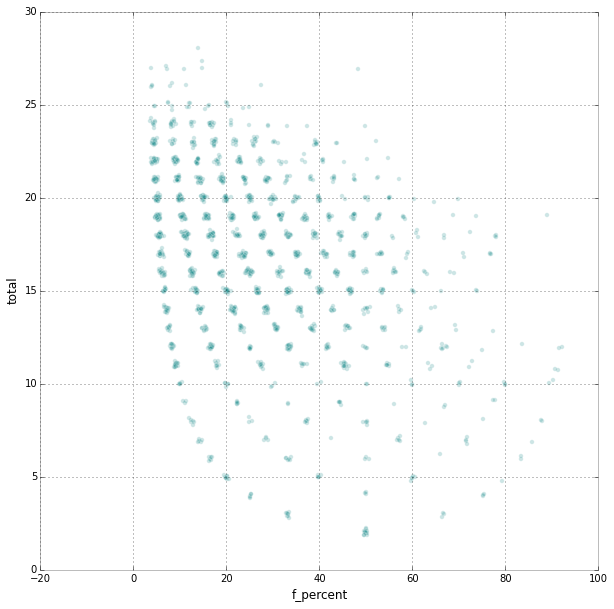

In [32]:
df_jitter = df.copy()
df_jitter['f_percent'] = df_jitter['f_percent'] + np.random.normal(0, 0.3, len(df))
df_jitter['total'] = df_jitter['total'] + np.random.normal(0, 0.1, len(df))


df_jitter.plot(kind='scatter', x='f_percent', y='total', figsize=(10,10), c='teal', alpha=.2)
plt.savefig('img/inspections_total_vs_failed.png')

In [12]:
df_jitterdf.head()

,failed,passed,total,boro,f_percent
B001,3,15,18,B,16.666667
B002,5,14,19,B,26.315789
B003,2,19,21,B,9.523810
B006,6,5,11,B,54.545455
B007,5,6,11,B,45.454545
